# Histogram

## Import Library

In [394]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict
import copy
import torch
# from PIL import Image
# import pickle
import import_ipynb
sys.path.append(os.pardir)
from DataSet.mnist import load_mnist
# from Ch2_3.handWrittenDigit import get_data, init_network, predict, img_show
# from Ch2_3.activation_function import softmax, sigmoid
# from Ch4.load_error import cross_entropy_error
from Ch5.layer_naive import Affine, ReLu, SoftmaxWithLoss, Sigmoid
from Ch6.training_tech import AdaGrad, SGD

## Define Sigmoid Function

In [342]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

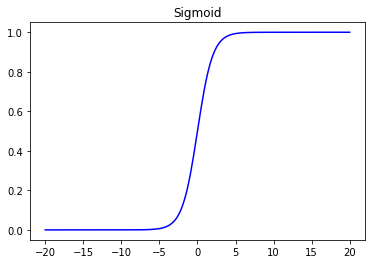

In [343]:
x = np.linspace(-20,20,200)
y = sigmoid(x)
plt.plot(x,y,'-b')
plt.title('Sigmoid')
plt.show()

## Forward Propagation

In [344]:
input_x = np.random.randn(1000,100)# number of datas = 1000
node_num = 100               # number of neurons per hidden layer
hidden_layer_size = 5        # 5 hidden layers
activations = {}             # save output of avtivation function

## Standard Deviation : 1

In [345]:
x = input_x.copy()
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

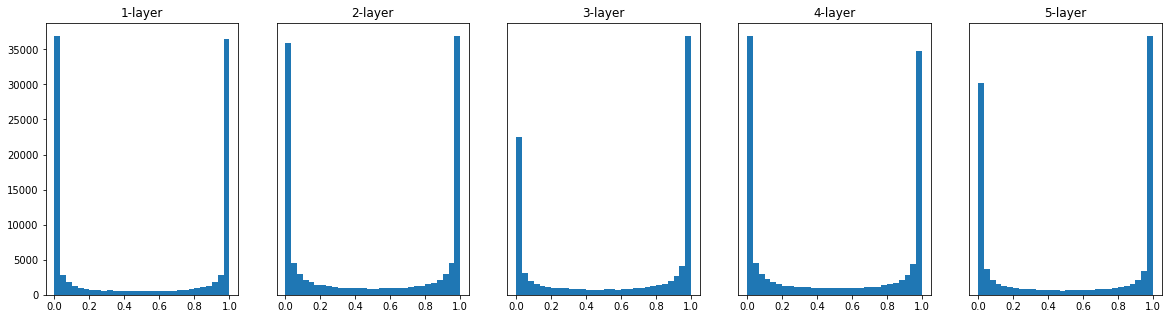

In [346]:
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    if i != 0:
        plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

## Standard Deviation : 0.01

In [347]:
x = input_x.copy()
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

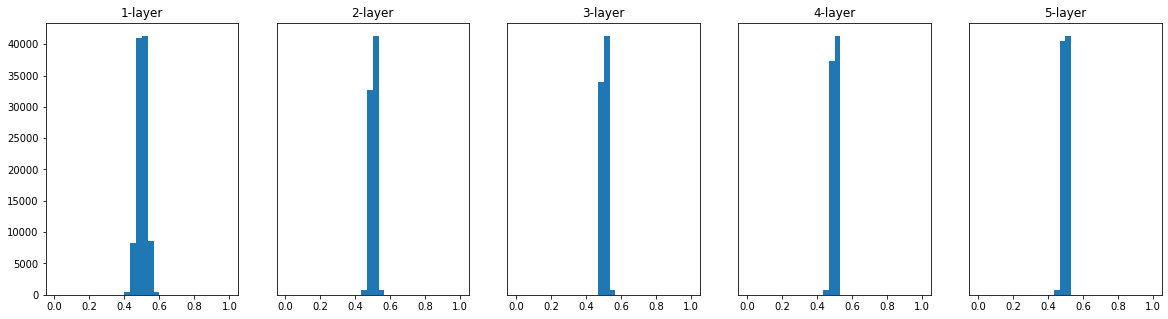

In [348]:
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    if i != 0:
        plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

## Xavier 초깃값

## Standard Deviation : $1\over\sqrt n$

In [349]:
x = input_x.copy()
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

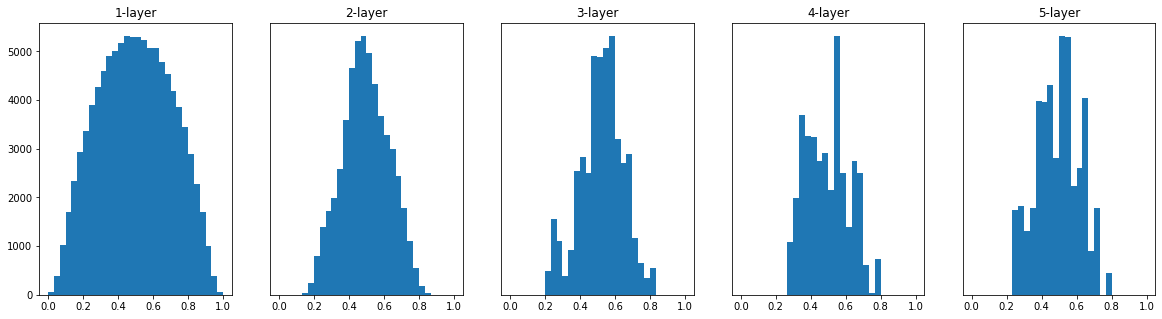

In [350]:
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    if i != 0:
        plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

## Define tanh

In [351]:
def tanh(x):
    return np.tanh(x)

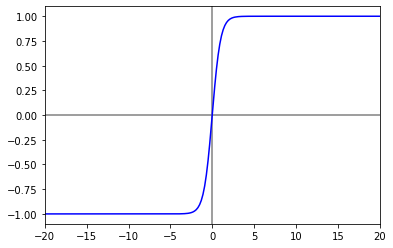

In [352]:
X = np.linspace(-20,20,200)
Y = tanh(X)
plt.plot([0,0],[-2,2],'-',color='gray')
plt.plot([-25,25],[0,0],'-',color='gray')
plt.plot(X,Y,'-b')
plt.xlim(-20,20)
plt.ylim(-1.1,1.1)
plt.show()

## tanh with Standard Deviation : $1\over\sqrt n$

In [353]:
x = input_x.copy()
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = tanh(a)
    activations[i] = z

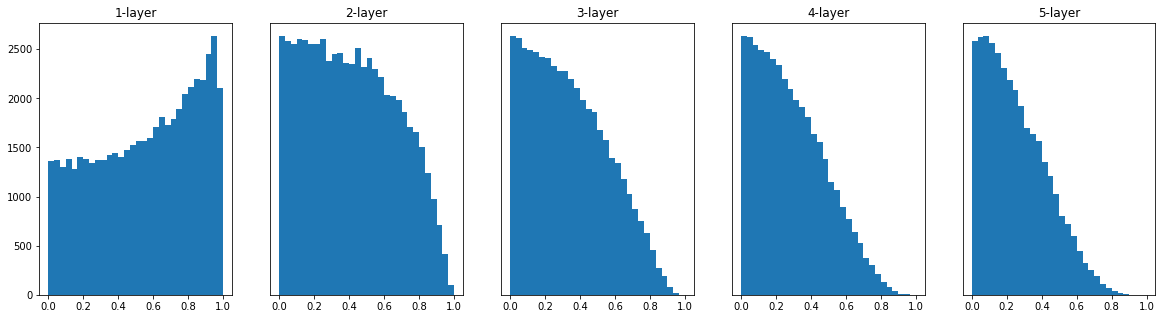

In [354]:
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    if i != 0:
        plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

## ReLu with Standard Deviation : 0.01

In [355]:
def relu(x):
    return np.maximum(0,x)

In [356]:
x = input_x.copy()
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x,w)
    z = relu(a)
    activations[i] = z

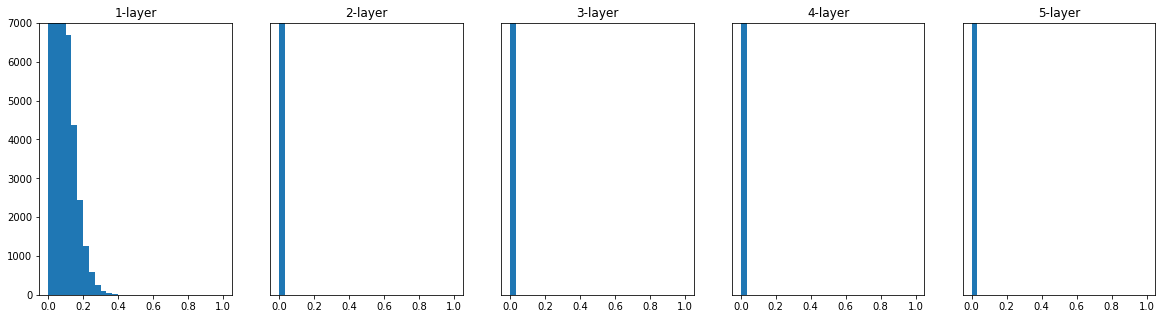

In [357]:
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.ylim(0,7000)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    if i != 0:
        plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

## ReLu with Xavier

In [358]:
x = input_x.copy()
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = relu(a)
    activations[i] = z

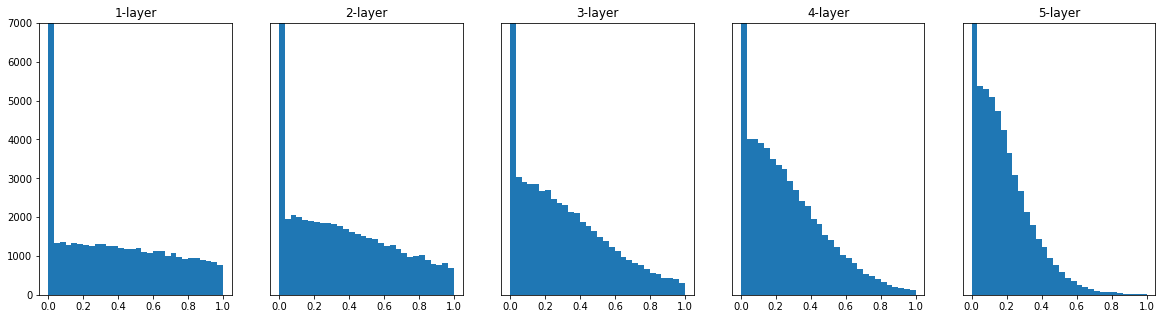

In [359]:
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.ylim(0,7000)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    if i != 0:
        plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

## ReLu with He

In [360]:
x = input_x.copy()
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num)*np.sqrt(2) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = relu(a)
    activations[i] = z

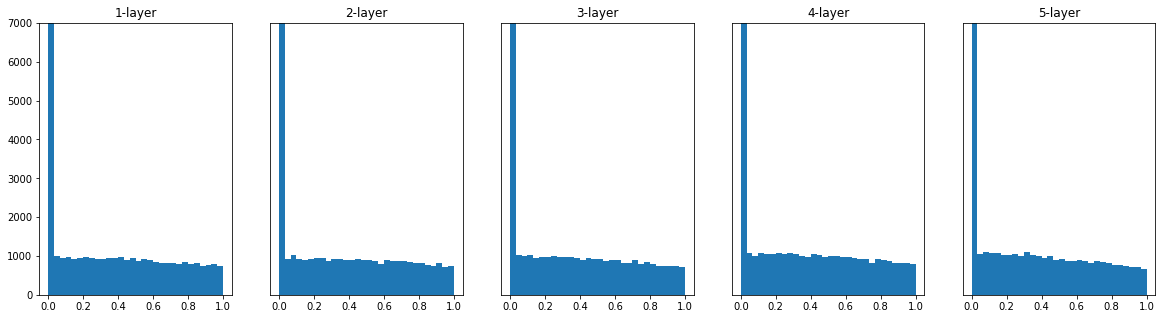

In [361]:
plt.figure(figsize=(20,5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.ylim(0,7000)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0,1))
    if i != 0:
        plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.show()

## std= 0.01, He, Xavier in MNIST

In [365]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True,one_hot_label=True)

In [378]:
class MulLayer:
    def __init__(self, input_size, output_size,\
                    first_std=0.01, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = first_std * \
                            np.random.randn(input_size, 50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(50, 50)
        self.params['b2'] = np.zeros(50)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(50, 50)
        self.params['b3'] = np.zeros(50)
        self.params['W4'] = weight_init_std * \
                            np.random.randn(50, 50)
        self.params['b4'] = np.zeros(50)
        self.params['W5'] = weight_init_std * \
                            np.random.randn(50, output_size)
        self.params['b5'] = np.zeros(output_size)
        
        self.layers = OrderedDict()
        self.layers['Affine1'] = \
                Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = ReLu()
        self.layers['Affine2'] = \
                Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = ReLu()
        self.layers['Affine3'] = \
                Affine(self.params['W3'], self.params['b3'])
        self.layers['Relu3'] = ReLu()
        self.layers['Affine4'] = \
                Affine(self.params['W4'], self.params['b4'])
        self.layers['Relu4'] = ReLu()
        self.layers['Affine5'] = \
                Affine(self.params['W5'], self.params['b5'])
        
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
    
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        self.loss(x, t)
        
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        grads['W3'] = self.layers['Affine3'].dW
        grads['b3'] = self.layers['Affine3'].db
        grads['W4'] = self.layers['Affine4'].dW
        grads['b4'] = self.layers['Affine4'].db
        grads['W5'] = self.layers['Affine5'].dW
        grads['b5'] = self.layers['Affine5'].db
        
        return grads
        

In [383]:
# optimizer
optimizers = {}
optimizers['std0.01'] = SGD()
optimizers['He'] = SGD()
optimizers['Xavier'] = SGD()

networks = {}
train_loss = {}
networks['std0.01'] = MulLayer(input_size=784, \
    output_size=10,first_std=0.01,weight_init_std=0.01)
train_loss['std0.01'] = []
networks['He'] = MulLayer(input_size=784, \
    output_size=10,first_std=np.sqrt(2)/28,weight_init_std=0.2)
train_loss['He'] = []
networks['Xavier'] = MulLayer(input_size=784, \
    output_size=10,first_std=1/28,weight_init_std=1/(5*np.sqrt(2)))
train_loss['Xavier'] = []

# hyper parameter
iters_num = 2000
train_size = x_train.shape[0]
batch_size = 128
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params,grads)
        loss = networks[key].loss(x_batch,t_batch)
        train_loss[key].append(loss)
    
    if i % 500 == 0:
        print("========="+"iteration"+"=========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch,t_batch)
            print(key + ":" + str(loss))

=========iteration=========
std0.01:2.302504853254085
He:2.400213950057406
Xavier:2.302677754254429
=========iteration=========
std0.01:2.300647913993635
He:0.3611125752535361
Xavier:0.8376573905309114
=========iteration=========
std0.01:2.302996252359263
He:0.24511062417371976
Xavier:0.37044150123453445
=========iteration=========
std0.01:2.3003951147142043
He:0.2347610547084953
Xavier:0.3048412532357848


In [384]:
def smooth_curve(x):
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]

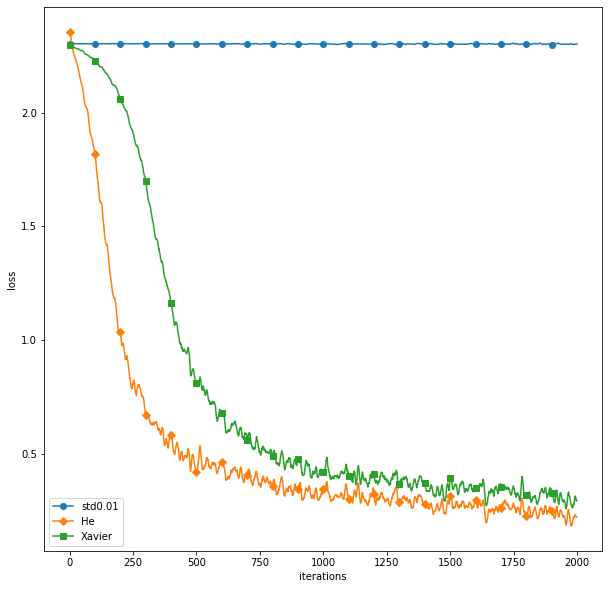

In [386]:
markers = {"std0.01":"o","He":"D","Xavier":"s"}
x = np.arange(iters_num)
plt.figure(figsize=(10,10))
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key],markevery=100, label=key)
plt.xlabel('iterations')
plt.ylabel('loss')
# plt.ylim(0,1)
plt.legend()
plt.show()
    

## Compare Accuracy

In [387]:
class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


In [388]:
class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원  

        # 시험할 때 사용할 평균과 분산
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward 시에 사용할 중간 데이터
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


In [395]:
class MultiLayerNetExtend:
    """완전 연결 다층 신경망(확장판)
    가중치 감소, 드롭아웃, 배치 정규화 구현

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    use_dropout : 드롭아웃 사용 여부
    dropout_ration : 드롭아웃 비율
    use_batchNorm : 배치 정규화 사용 여부
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ration = 0.5, use_batchnorm=False):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': ReLu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
                
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ration)

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1]) 
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x, train_flg=False):
        for key, layer in self.layers.items():
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        """
        y = self.predict(x, train_flg)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        Y = self.predict(X, train_flg=False)
        Y = np.argmax(Y, axis=1)
        if T.ndim != 1 : T = np.argmax(T, axis=1)

        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t, train_flg=True)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

In [396]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


In [397]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.105 - 0.092
epoch:1 | 0.097 - 0.105


<string>:11: RuntimeWarning: divide by zero encountered in log
/var/folders/0l/3n3y7jns43l8x_lzc7n9yhqh0000gn/T/ipykernel_79275/3969557756.py:88: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/var/folders/0l/3n3y7jns43l8x_lzc7n9yhqh0000gn/T/ipykernel_79275/3969557756.py:88: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.135
epoch:3 | 0.097 - 0.157
epoch:4 | 0.097 - 0.17
epoch:5 | 0.097 - 0.194
epoch:6 | 0.097 - 0.21
epoch:7 | 0.097 - 0.228
epoch:8 | 0.097 - 0.244
epoch:9 | 0.097 - 0.274
epoch:10 | 0.097 - 0.285
epoch:11 | 0.097 - 0.319
epoch:12 | 0.097 - 0.322
epoch:13 | 0.097 - 0.346
epoch:14 | 0.097 - 0.359
epoch:15 | 0.097 - 0.383
epoch:16 | 0.097 - 0.389
epoch:17 | 0.097 - 0.403
epoch:18 | 0.097 - 0.42
epoch:19 | 0.097 - 0.428
============== 2/16 ==============
epoch:0 | 0.097 - 0.09
epoch:1 | 0.097 - 0.108


<string>:11: RuntimeWarning: divide by zero encountered in log
/var/folders/0l/3n3y7jns43l8x_lzc7n9yhqh0000gn/T/ipykernel_79275/3969557756.py:88: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/var/folders/0l/3n3y7jns43l8x_lzc7n9yhqh0000gn/T/ipykernel_79275/3969557756.py:88: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:2 | 0.097 - 0.159
epoch:3 | 0.097 - 0.196
epoch:4 | 0.097 - 0.234
epoch:5 | 0.097 - 0.257
epoch:6 | 0.097 - 0.264
epoch:7 | 0.097 - 0.287
epoch:8 | 0.097 - 0.312
epoch:9 | 0.097 - 0.338
epoch:10 | 0.097 - 0.359
epoch:11 | 0.097 - 0.37
epoch:12 | 0.097 - 0.391
epoch:13 | 0.097 - 0.404
epoch:14 | 0.097 - 0.423
epoch:15 | 0.097 - 0.451
epoch:16 | 0.097 - 0.462
epoch:17 | 0.097 - 0.471
epoch:18 | 0.097 - 0.487
epoch:19 | 0.097 - 0.5
============== 3/16 ==============
epoch:0 | 0.129 - 0.088
epoch:1 | 0.328 - 0.092
epoch:2 | 0.474 - 0.101
epoch:3 | 0.581 - 0.133
epoch:4 | 0.678 - 0.175
epoch:5 | 0.728 - 0.203
epoch:6 | 0.78 - 0.242
epoch:7 | 0.83 - 0.28
epoch:8 | 0.844 - 0.312
epoch:9 | 0.886 - 0.348
epoch:10 | 0.907 - 0.389
epoch:11 | 0.926 - 0.412
epoch:12 | 0.946 - 0.439
epoch:13 | 0.948 - 0.472
epoch:14 | 0.962 - 0.5
epoch:15 | 0.968 - 0.511
epoch:16 | 0.972 - 0.535
epoch:17 | 0.977 - 0.563
epoch:18 | 0.983 - 0.573
epoch:19 | 0.986 - 0.59
============== 4/16 ==============
epoch:0

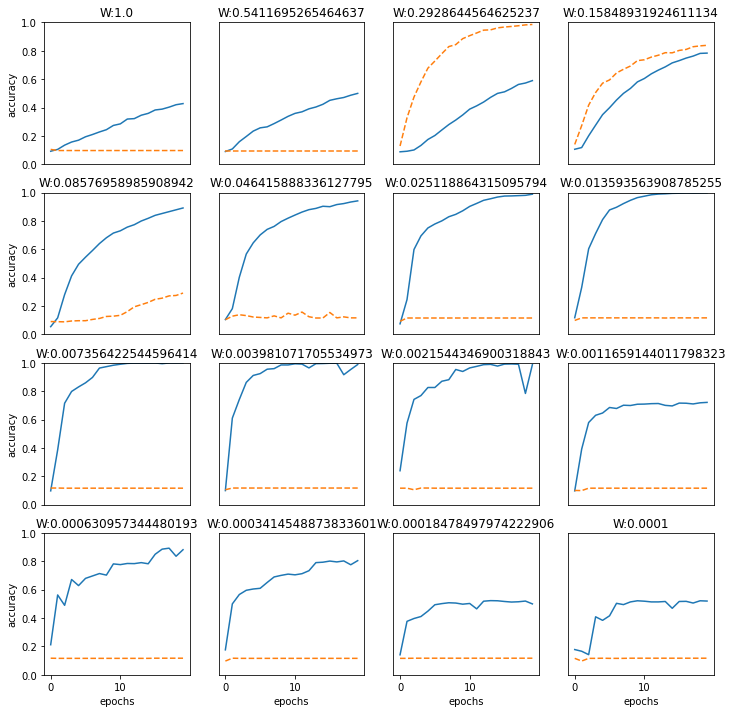

In [401]:
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(12,12))
for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    
plt.show()